# Description

It takes a GWAS that was imputed and postprocessed (using the PrediXcan scripts here https://github.com/hakyimlab/summary-gwas-imputation) and verifies that the Manhattan and QQ-plots look fine (without inflation).

# Modules

In [2]:
library(tidyverse)

── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [3]:
library(qqman)



For example usage please run: vignette('qqman')



Citation appreciated but not required:

Turner, (2018). qqman: an R package for visualizing GWAS results using Q-Q and manhattan plots. Journal of Open Source Software, 3(25), 731, https://doi.org/10.21105/joss.00731.





# Paths

In [4]:
DATA_DIR <- Sys.getenv("PHENOPLIER_PROJECTS_ASTHMA_COPD_RESULTS_DIR")

In [5]:
DATA_DIR

[1] "/opt/data/projects/asthma-copd/results"

In [6]:
INPUT_GWAS_DIR <- file.path(DATA_DIR, "final_imputed_gwas")

In [7]:
INPUT_GWAS_DIR

[1] "/opt/data/projects/asthma-copd/results/final_imputed_gwas"

# Asthma only

In [8]:
gwas_title <- "Asthma only (imputed)"

## Load data

In [9]:
gwas <- as.data.frame(read_table(file.path(INPUT_GWAS_DIR, "GWAS_Asthma_only_GLM_SNPs_info0.7-harmonized-imputed.txt.gz")))


── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  variant_id = col_character(),
  panel_variant_id = col_character(),
  chromosome = col_character(),
  position = col_double(),
  effect_allele = col_character(),
  non_effect_allele = col_character(),
  current_build = col_character(),
  frequency = col_double(),
  sample_size = col_double(),
  zscore = col_double(),
  pvalue = col_double(),
  effect_size = col_double(),
  standard_error = col_double(),
  imputation_status = col_character(),
  n_cases = col_double()
)



In [10]:
dim(gwas)

[1] 8580225      15

In [11]:
head(gwas)

,variant_id,panel_variant_id,chromosome,position,effect_allele,non_effect_allele,current_build,frequency,sample_size,zscore,pvalue,effect_size,standard_error,imputation_status,n_cases
,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,rs141149254,chr1_54490_G_A_b38,chr1,54490,A,G,hg38,0.17766990,181862,0.6090753,0.5424745,NA,NA,imputed,NA
2,rs188486692,chr1_87021_T_C_b38,chr1,87021,C,T,hg38,0.01165049,181862,-0.9408289,0.3467925,NA,NA,imputed,NA
3,rs112455420,chr1_263722_C_G_b38,chr1,263722,G,C,hg38,0.12233010,181862,0.5627759,0.5735875,NA,NA,imputed,NA
4,rs144425991,chr1_594402_C_T_b38,chr1,594402,T,C,hg38,0.02621359,181862,0.1837688,0.8541948,NA,NA,imputed,NA
5,rs55973403,chr1_630555_C_T_b38,chr1,630555,T,C,hg38,0.02135922,181862,-0.2054823,0.8371953,NA,NA,imputed,NA
6,rs564223368,chr1_630607_C_T_b38,chr1,630607,T,C,hg38,0.01165049,181862,0.2517582,0.8012280,NA,NA,imputed,NA


### Extract chromosome

In [12]:
unique(gwas$chromosome)

[1] "chr1"  "chr2"  "chr3"  "chr4"  "chr5"  "chr6"  "chr7"  "chr8"  "chr9" 
[10] "chr10" "chr11" "chr12" "chr13" "chr14" "chr15" "chr16" "chr17" "chr18"
[19] "chr19" "chr20" "chr21" "chr22"

In [13]:
gwas$chrom <- gsub("chr([0-9]+)", "\\1", gwas$chromosome)
gwas <- transform(gwas, chrom = as.numeric(chrom))

In [14]:
unique(gwas$chrom)

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22

## Stats

In [15]:
summary(gwas)

  variant_id        panel_variant_id    chromosome           position        
 Length:8580225     Length:8580225     Length:8580225     Min.   :    10596  
 Class :character   Class :character   Class :character   1st Qu.: 32253569  
 Mode  :character   Mode  :character   Mode  :character   Median : 68998453  
                                                          Mean   : 78475167  
                                                          3rd Qu.:113909173  
                                                          Max.   :248928328  
                                                                             
 effect_allele      non_effect_allele  current_build        frequency      
 Length:8580225     Length:8580225     Length:8580225     Min.   :0.00000  
 Class :character   Class :character   Class :character   1st Qu.:0.03592  
 Mode  :character   Mode  :character   Mode  :character   Median :0.13883  
                                                          Mean   :0.2459

## Remove NA pvalues

In [16]:
dim(gwas)

[1] 8580225      16

In [17]:
gwas <- gwas %>% filter(pvalue >= 0 & pvalue <= 1)

In [18]:
dim(gwas)

[1] 8578486      16

## Manhattan plot

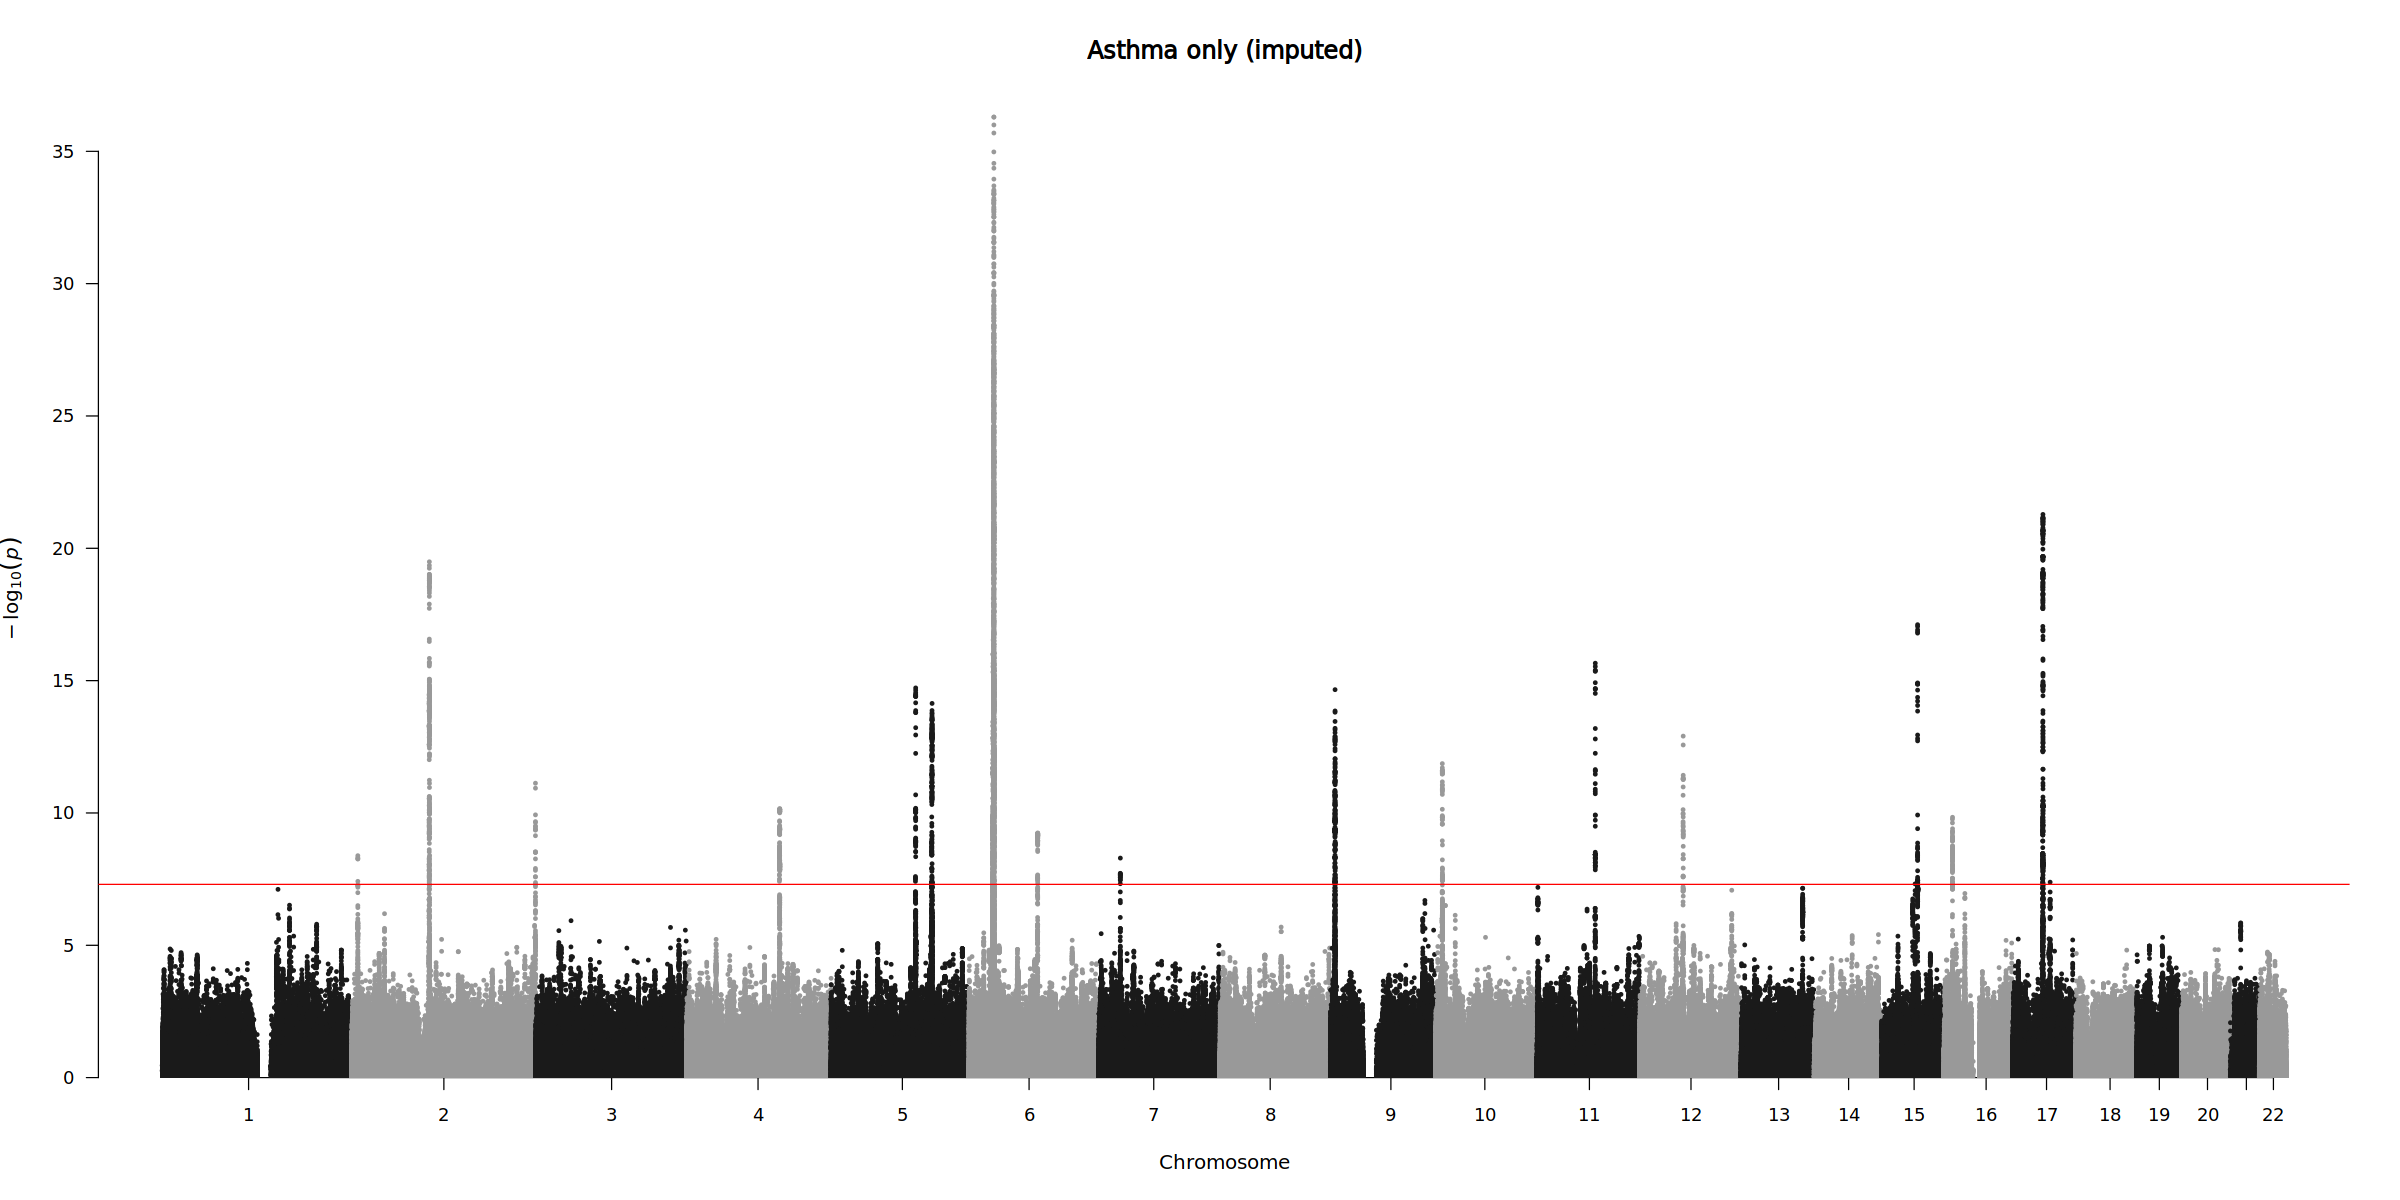

In [19]:
options(repr.plot.width = 20, repr.plot.height = 10)

manhattan(
  gwas,
  chr = "chrom",
  bp = "position",
  p = "pvalue",
  snp = "variant_id",
  main = gwas_title,
  suggestiveline = F,
  genomewideline = -log10(5e-08),
  cex = 0.6,
  cex.axis = 0.9,
)

## QQ-plot

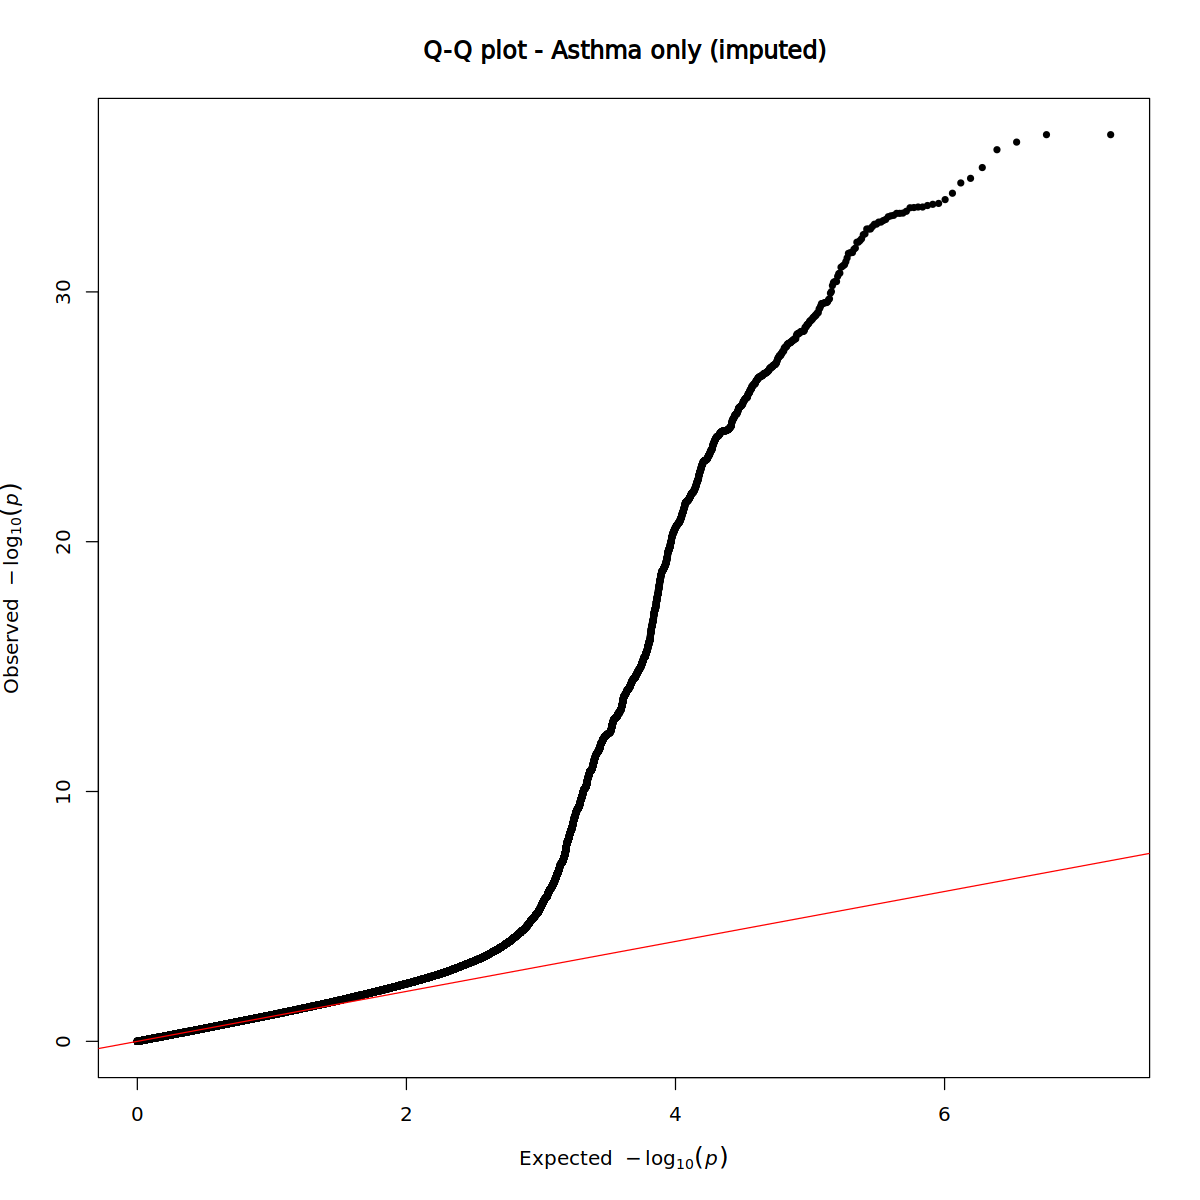

In [20]:
options(repr.plot.width = 10, repr.plot.height = 10)

qq(
  gwas$pvalue,
  main = paste0("Q-Q plot - ", gwas_title)
)

# COPD only

In [21]:
gwas_title <- "COPD only (imputed)"

## Load data

In [22]:
gwas <- as.data.frame(read_table(file.path(INPUT_GWAS_DIR, "GWAS_COPD_only_GLM_SNPs_info0.7-harmonized-imputed.txt.gz")))


── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  variant_id = col_character(),
  panel_variant_id = col_character(),
  chromosome = col_character(),
  position = col_double(),
  effect_allele = col_character(),
  non_effect_allele = col_character(),
  current_build = col_character(),
  frequency = col_double(),
  sample_size = col_double(),
  zscore = col_double(),
  pvalue = col_double(),
  effect_size = col_double(),
  standard_error = col_double(),
  imputation_status = col_character(),
  n_cases = col_double()
)



In [23]:
dim(gwas)

[1] 8590917      15

In [24]:
head(gwas)

,variant_id,panel_variant_id,chromosome,position,effect_allele,non_effect_allele,current_build,frequency,sample_size,zscore,pvalue,effect_size,standard_error,imputation_status,n_cases
,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,rs141149254,chr1_54490_G_A_b38,chr1,54490,A,G,hg38,0.17766990,175700,0.39970084,0.6893769,NA,NA,imputed,NA
2,rs188486692,chr1_87021_T_C_b38,chr1,87021,C,T,hg38,0.01165049,175700,1.18559304,0.2357831,NA,NA,imputed,NA
3,rs112455420,chr1_263722_C_G_b38,chr1,263722,G,C,hg38,0.12233010,175700,0.28888780,0.7726672,NA,NA,imputed,NA
4,rs144425991,chr1_594402_C_T_b38,chr1,594402,T,C,hg38,0.02621359,175700,0.34645141,0.7290035,NA,NA,imputed,NA
5,rs55973403,chr1_630555_C_T_b38,chr1,630555,T,C,hg38,0.02135922,175700,0.09172401,0.9269173,NA,NA,imputed,NA
6,rs564223368,chr1_630607_C_T_b38,chr1,630607,T,C,hg38,0.01165049,175700,-0.46471367,0.6421365,NA,NA,imputed,NA


### Extract chromosome

In [25]:
unique(gwas$chromosome)

[1] "chr1"  "chr2"  "chr3"  "chr4"  "chr5"  "chr6"  "chr7"  "chr8"  "chr9" 
[10] "chr10" "chr11" "chr12" "chr13" "chr14" "chr15" "chr16" "chr17" "chr18"
[19] "chr19" "chr20" "chr21" "chr22"

In [26]:
gwas$chrom <- gsub("chr([0-9]+)", "\\1", gwas$chromosome)
gwas <- transform(gwas, chrom = as.numeric(chrom))

In [27]:
unique(gwas$chrom)

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22

## Stats

In [28]:
summary(gwas)

  variant_id        panel_variant_id    chromosome           position        
 Length:8590917     Length:8590917     Length:8590917     Min.   :    10596  
 Class :character   Class :character   Class :character   1st Qu.: 32252049  
 Mode  :character   Mode  :character   Mode  :character   Median : 68980123  
                                                          Mean   : 78442593  
                                                          3rd Qu.:113893741  
                                                          Max.   :248928328  
                                                                             
 effect_allele      non_effect_allele  current_build        frequency      
 Length:8590917     Length:8590917     Length:8590917     Min.   :0.00000  
 Class :character   Class :character   Class :character   1st Qu.:0.03592  
 Mode  :character   Mode  :character   Mode  :character   Median :0.13883  
                                                          Mean   :0.2462

## Remove NA pvalues

In [29]:
dim(gwas)

[1] 8590917      16

In [30]:
gwas <- gwas %>% filter(pvalue >= 0 & pvalue <= 1)

In [31]:
dim(gwas)

[1] 8586183      16

## Manhattan plot

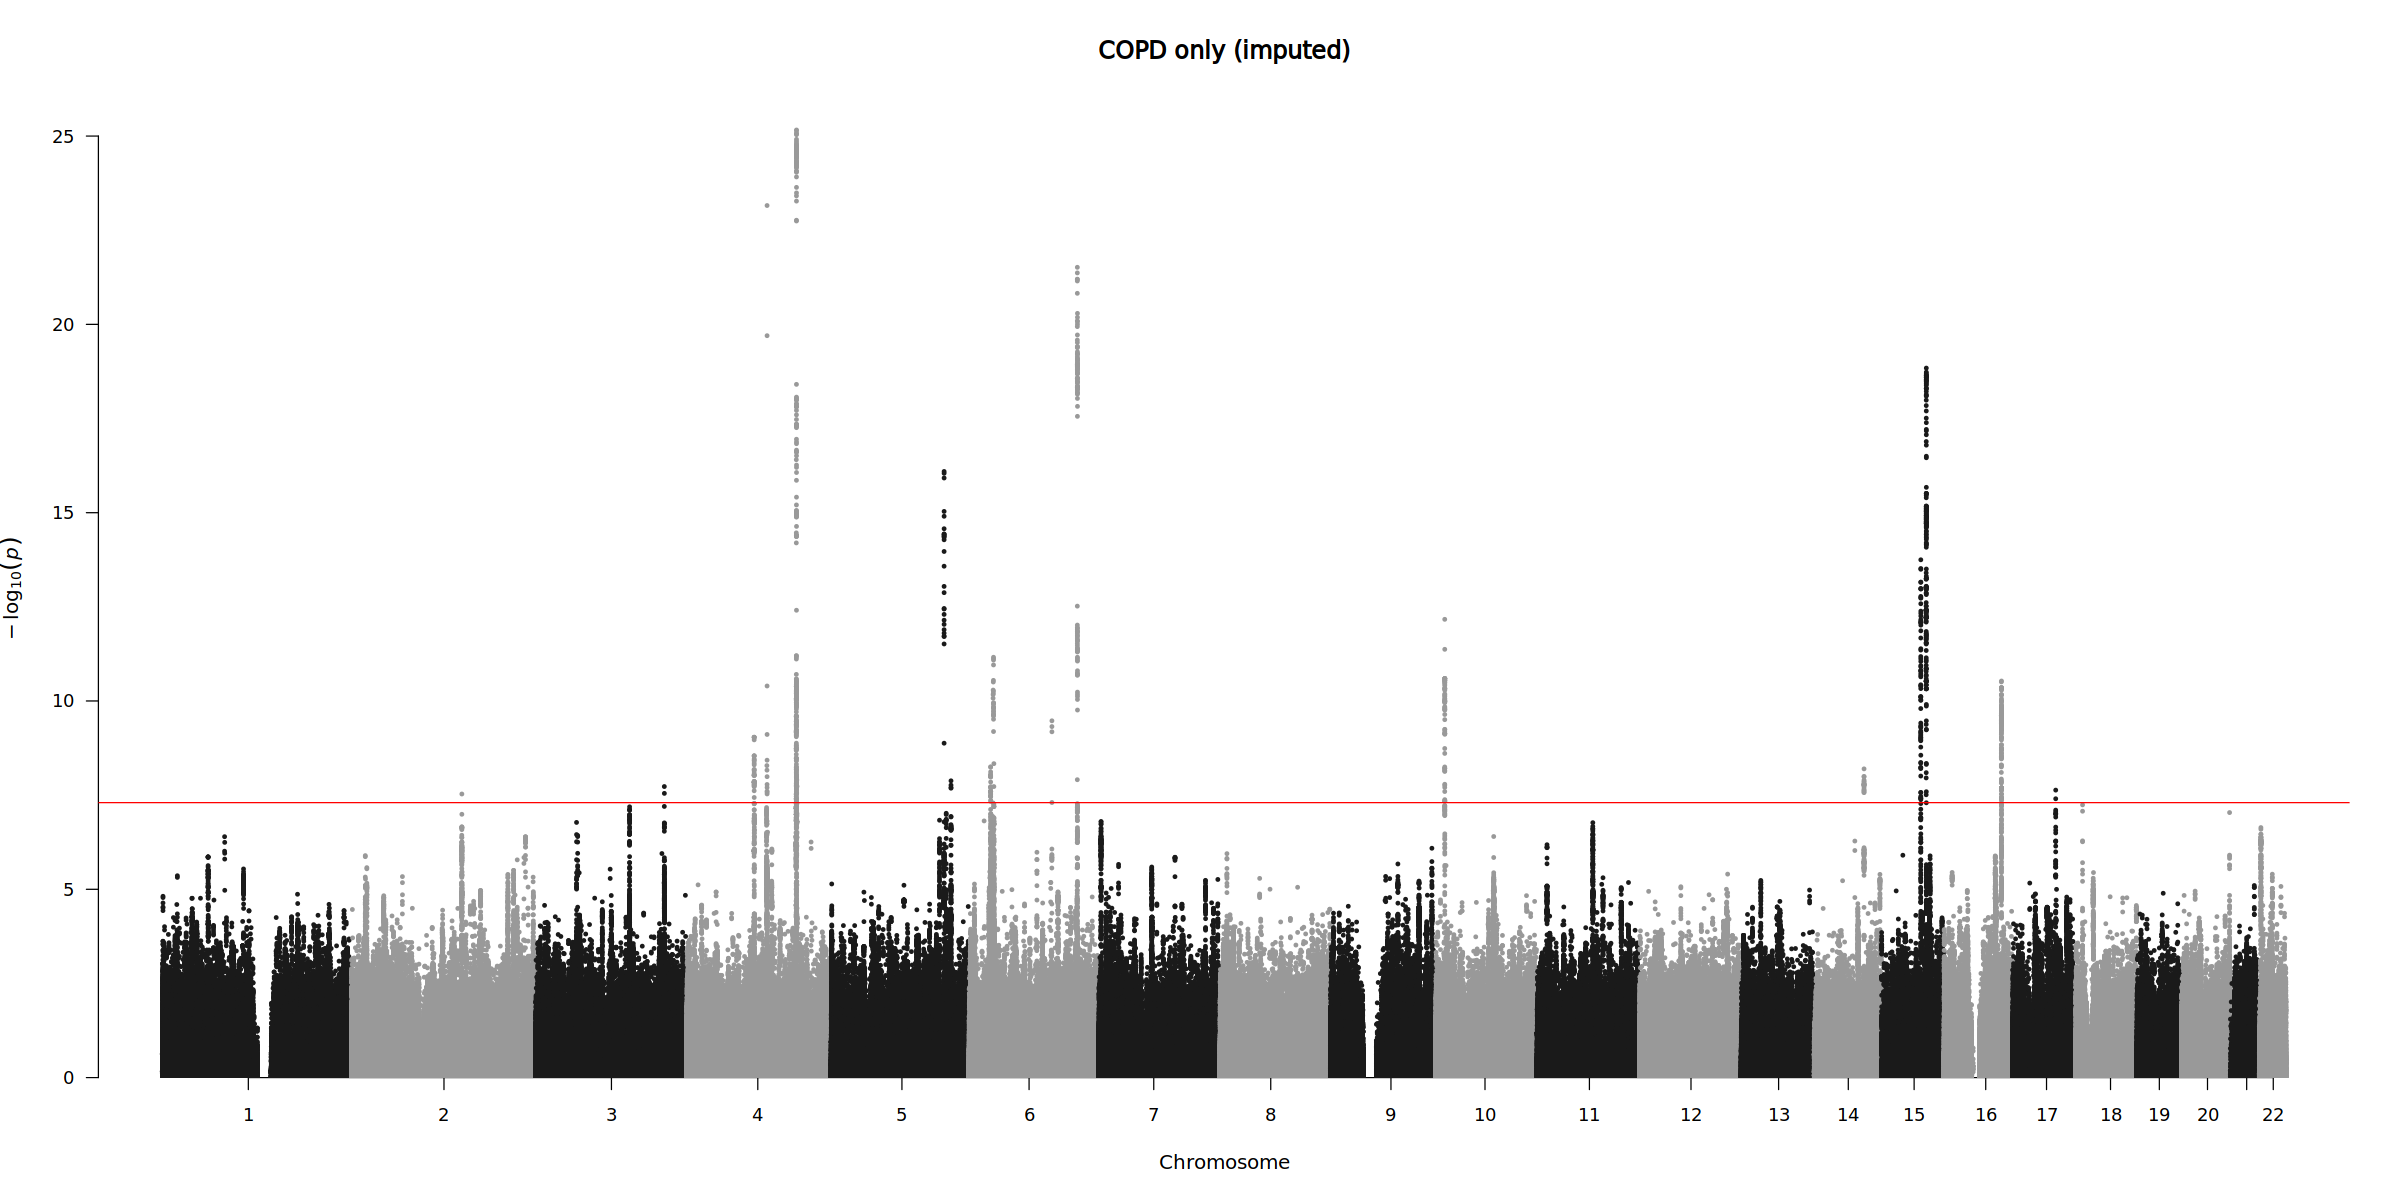

In [32]:
options(repr.plot.width = 20, repr.plot.height = 10)

manhattan(
  gwas,
  chr = "chrom",
  bp = "position",
  p = "pvalue",
  snp = "variant_id",
  main = gwas_title,
  suggestiveline = F,
  genomewideline = -log10(5e-08),
  cex = 0.6,
  cex.axis = 0.9,
)

## QQ-plot

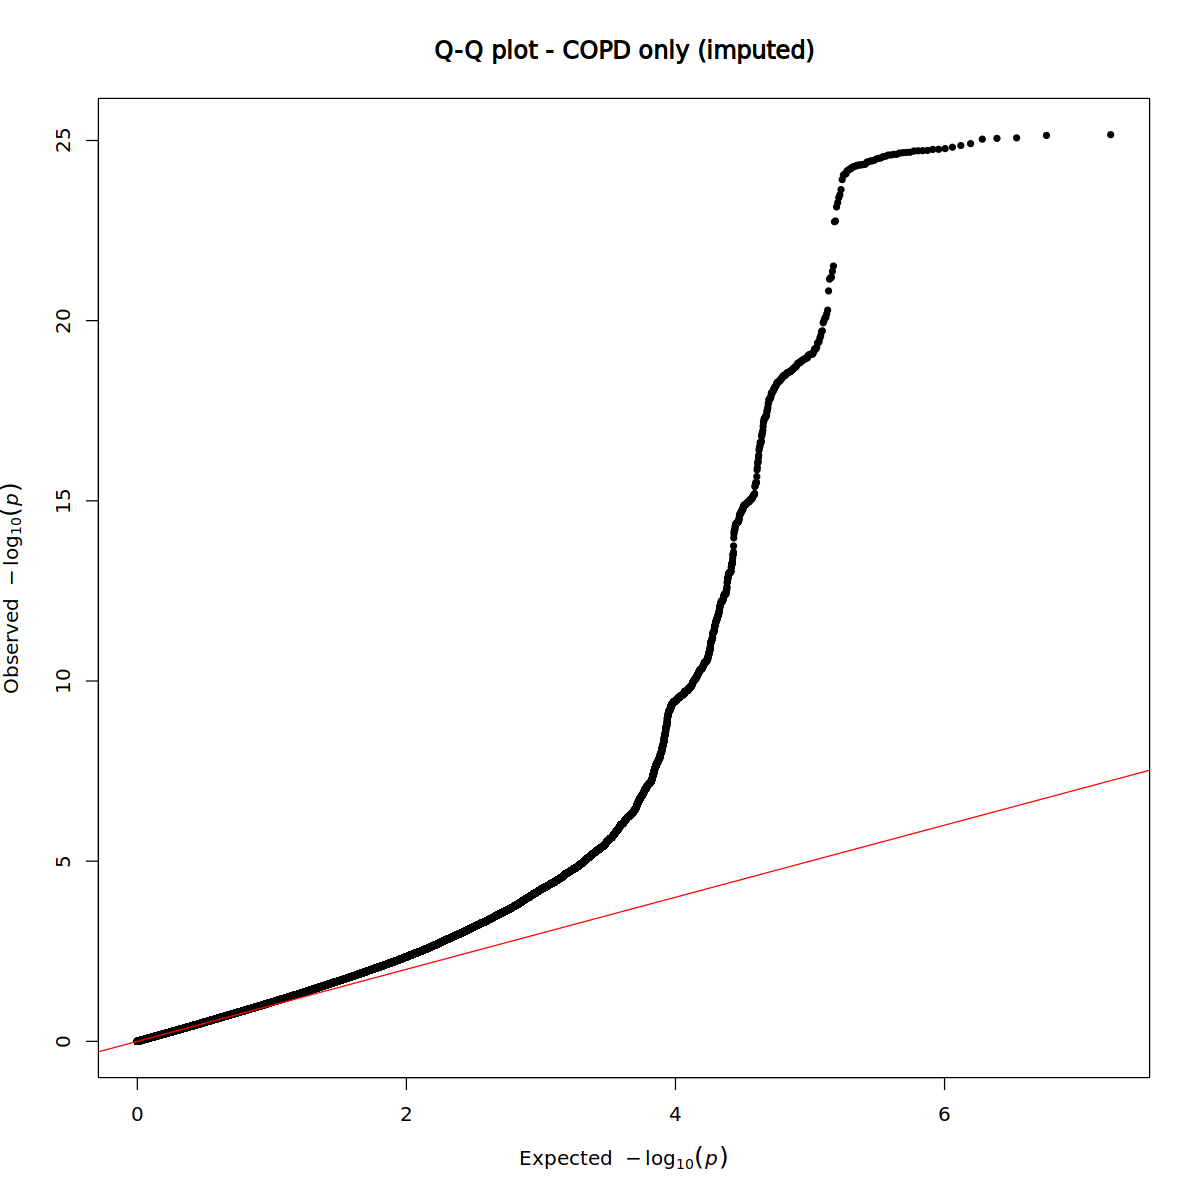

In [33]:
options(repr.plot.width = 10, repr.plot.height = 10)

qq(
  gwas$pvalue,
  main = paste0("Q-Q plot - ", gwas_title)
)

# Asthma-COPD Overlap Syndrome (ACOS)

In [34]:
gwas_title <- "ACOS (imputed)"

## Load data

In [35]:
gwas <- as.data.frame(read_table(file.path(INPUT_GWAS_DIR, "GWAS_ACO_GLM_SNPs_info0.7-harmonized-imputed.txt.gz")))


── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  variant_id = col_character(),
  panel_variant_id = col_character(),
  chromosome = col_character(),
  position = col_double(),
  effect_allele = col_character(),
  non_effect_allele = col_character(),
  current_build = col_character(),
  frequency = col_double(),
  sample_size = col_double(),
  zscore = col_double(),
  pvalue = col_double(),
  effect_size = col_double(),
  standard_error = col_double(),
  imputation_status = col_character(),
  n_cases = col_double()
)



In [36]:
dim(gwas)

[1] 8568681      15

In [37]:
head(gwas)

,variant_id,panel_variant_id,chromosome,position,effect_allele,non_effect_allele,current_build,frequency,sample_size,zscore,pvalue,effect_size,standard_error,imputation_status,n_cases
,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,rs141149254,chr1_54490_G_A_b38,chr1,54490,A,G,hg38,0.17766990,169680,-0.8711920,0.3836493,NA,NA,imputed,NA
2,rs188486692,chr1_87021_T_C_b38,chr1,87021,C,T,hg38,0.01165049,169680,-0.7270021,0.4672247,NA,NA,imputed,NA
3,rs112455420,chr1_263722_C_G_b38,chr1,263722,G,C,hg38,0.12233010,169680,0.9760807,0.3290245,NA,NA,imputed,NA
4,rs144425991,chr1_594402_C_T_b38,chr1,594402,T,C,hg38,0.02621359,169680,1.3359241,0.1815741,NA,NA,imputed,NA
5,rs55973403,chr1_630555_C_T_b38,chr1,630555,T,C,hg38,0.02135922,169680,0.8534615,0.3934034,NA,NA,imputed,NA
6,rs564223368,chr1_630607_C_T_b38,chr1,630607,T,C,hg38,0.01165049,169680,1.1365491,0.2557268,NA,NA,imputed,NA


### Extract chromosome

In [38]:
unique(gwas$chromosome)

[1] "chr1"  "chr2"  "chr3"  "chr4"  "chr5"  "chr6"  "chr7"  "chr8"  "chr9" 
[10] "chr10" "chr11" "chr12" "chr13" "chr14" "chr15" "chr16" "chr17" "chr18"
[19] "chr19" "chr20" "chr21" "chr22"

In [39]:
gwas$chrom <- gsub("chr([0-9]+)", "\\1", gwas$chromosome)
gwas <- transform(gwas, chrom = as.numeric(chrom))

In [40]:
unique(gwas$chrom)

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22

## Stats

In [41]:
summary(gwas)

  variant_id        panel_variant_id    chromosome           position        
 Length:8568681     Length:8568681     Length:8568681     Min.   :    10596  
 Class :character   Class :character   Class :character   1st Qu.: 32221544  
 Mode  :character   Mode  :character   Mode  :character   Median : 68929740  
                                                          Mean   : 78339662  
                                                          3rd Qu.:113703323  
                                                          Max.   :248928328  
                                                                             
 effect_allele      non_effect_allele  current_build        frequency      
 Length:8568681     Length:8568681     Length:8568681     Min.   :0.00000  
 Class :character   Class :character   Class :character   1st Qu.:0.03592  
 Mode  :character   Mode  :character   Mode  :character   Median :0.13883  
                                                          Mean   :0.2455

## Remove NA pvalues

In [42]:
dim(gwas)

[1] 8568681      16

In [43]:
gwas <- gwas %>% filter(pvalue >= 0 & pvalue <= 1)

In [44]:
dim(gwas)

[1] 8561476      16

## Manhattan plot

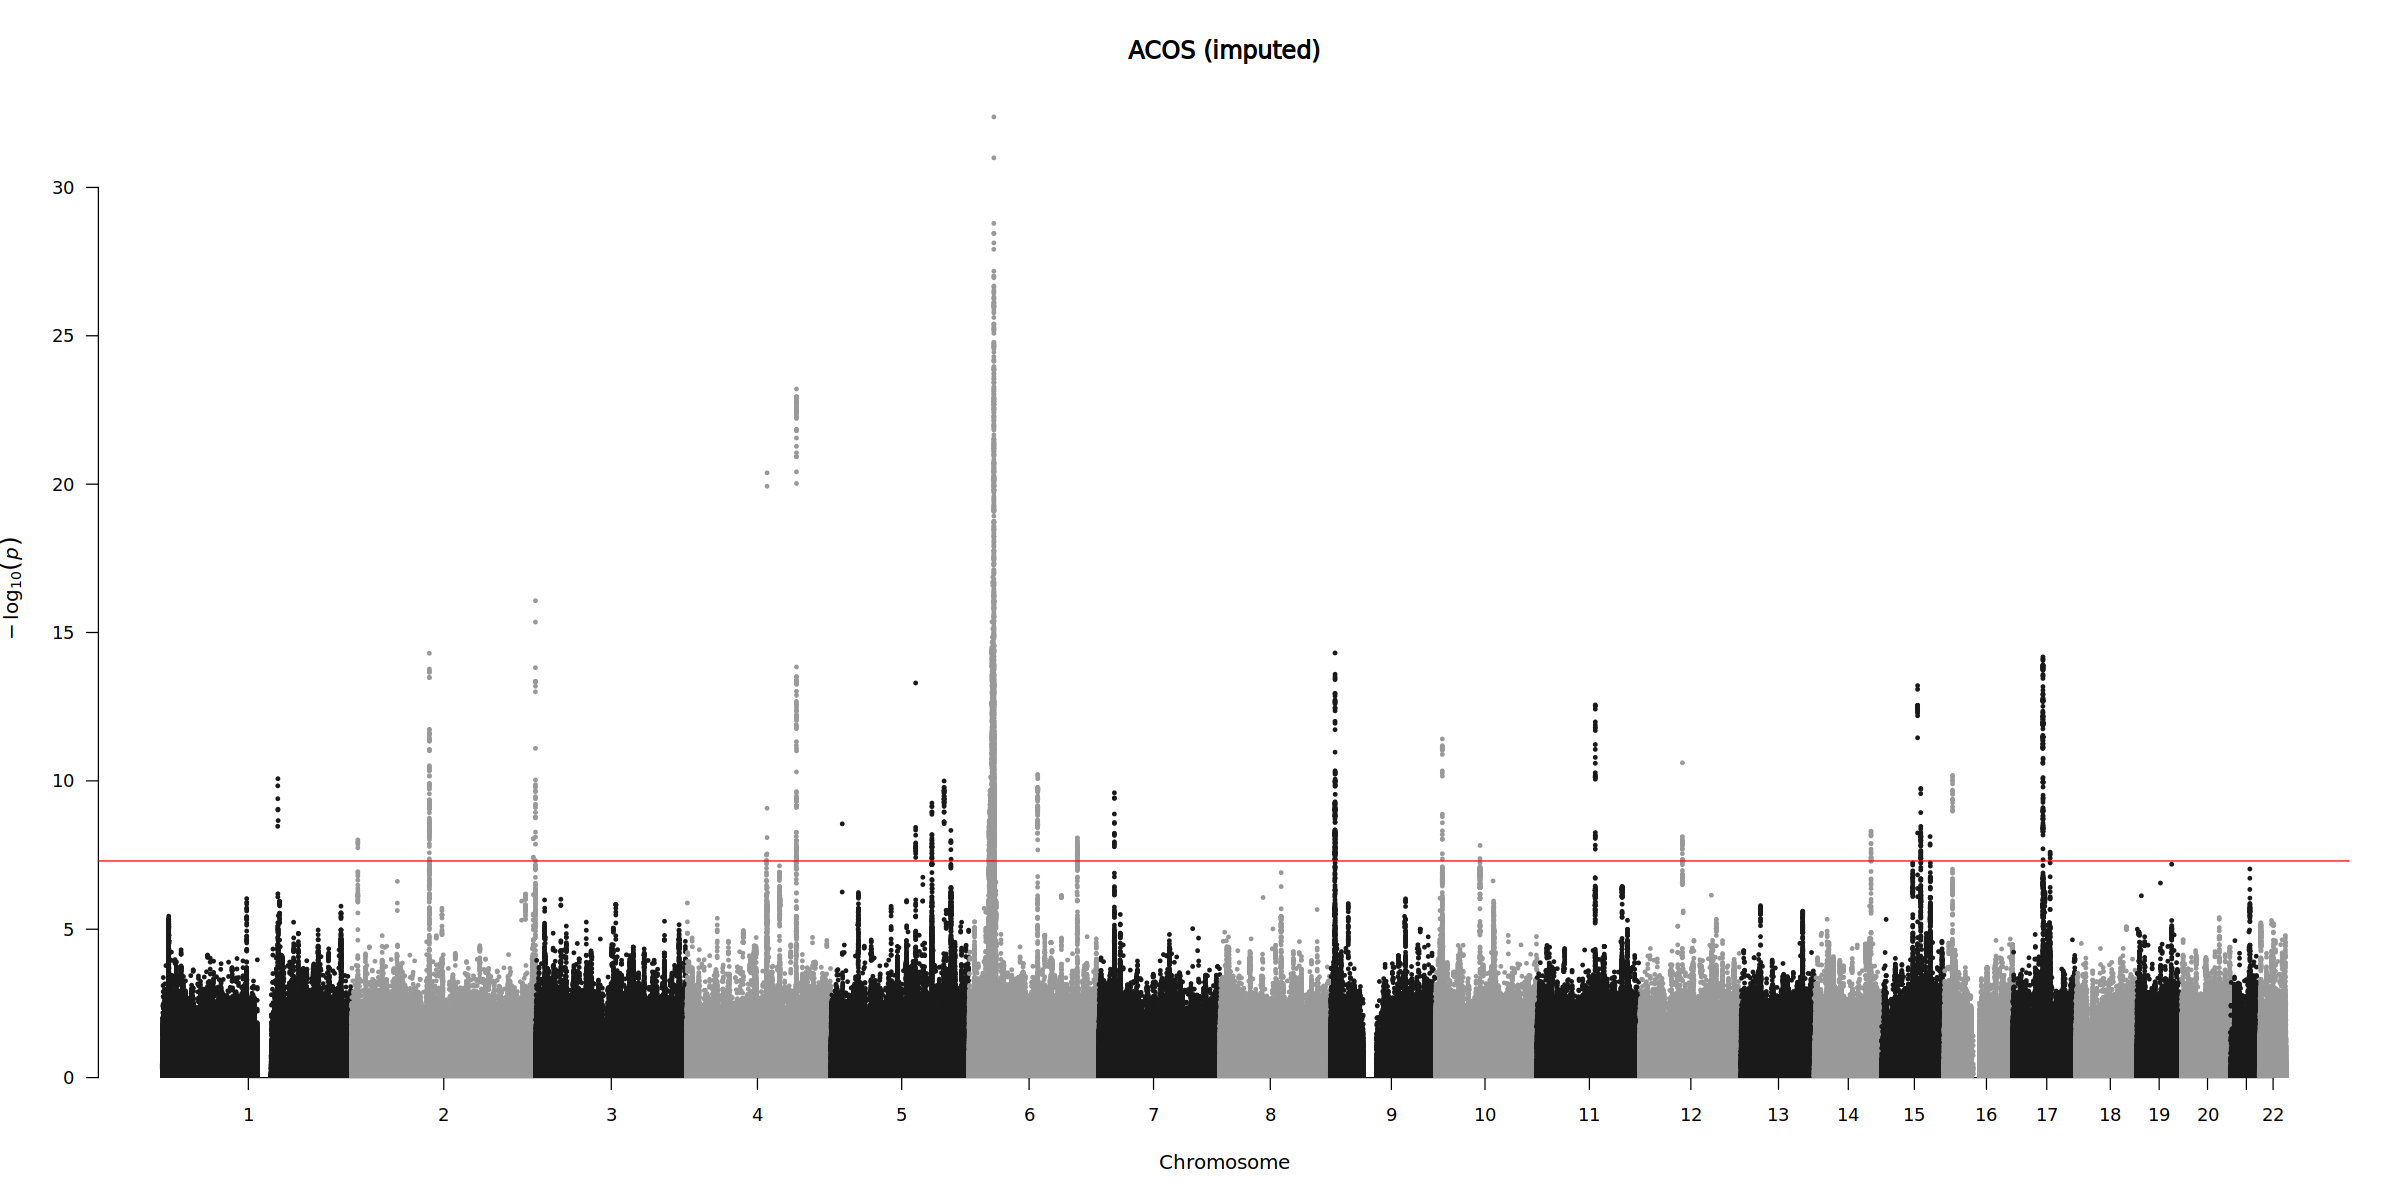

In [45]:
options(repr.plot.width = 20, repr.plot.height = 10)

manhattan(
  gwas,
  chr = "chrom",
  bp = "position",
  p = "pvalue",
  snp = "variant_id",
  main = gwas_title,
  suggestiveline = F,
  genomewideline = -log10(5e-08),
  cex = 0.6,
  cex.axis = 0.9,
)

## QQ-plot

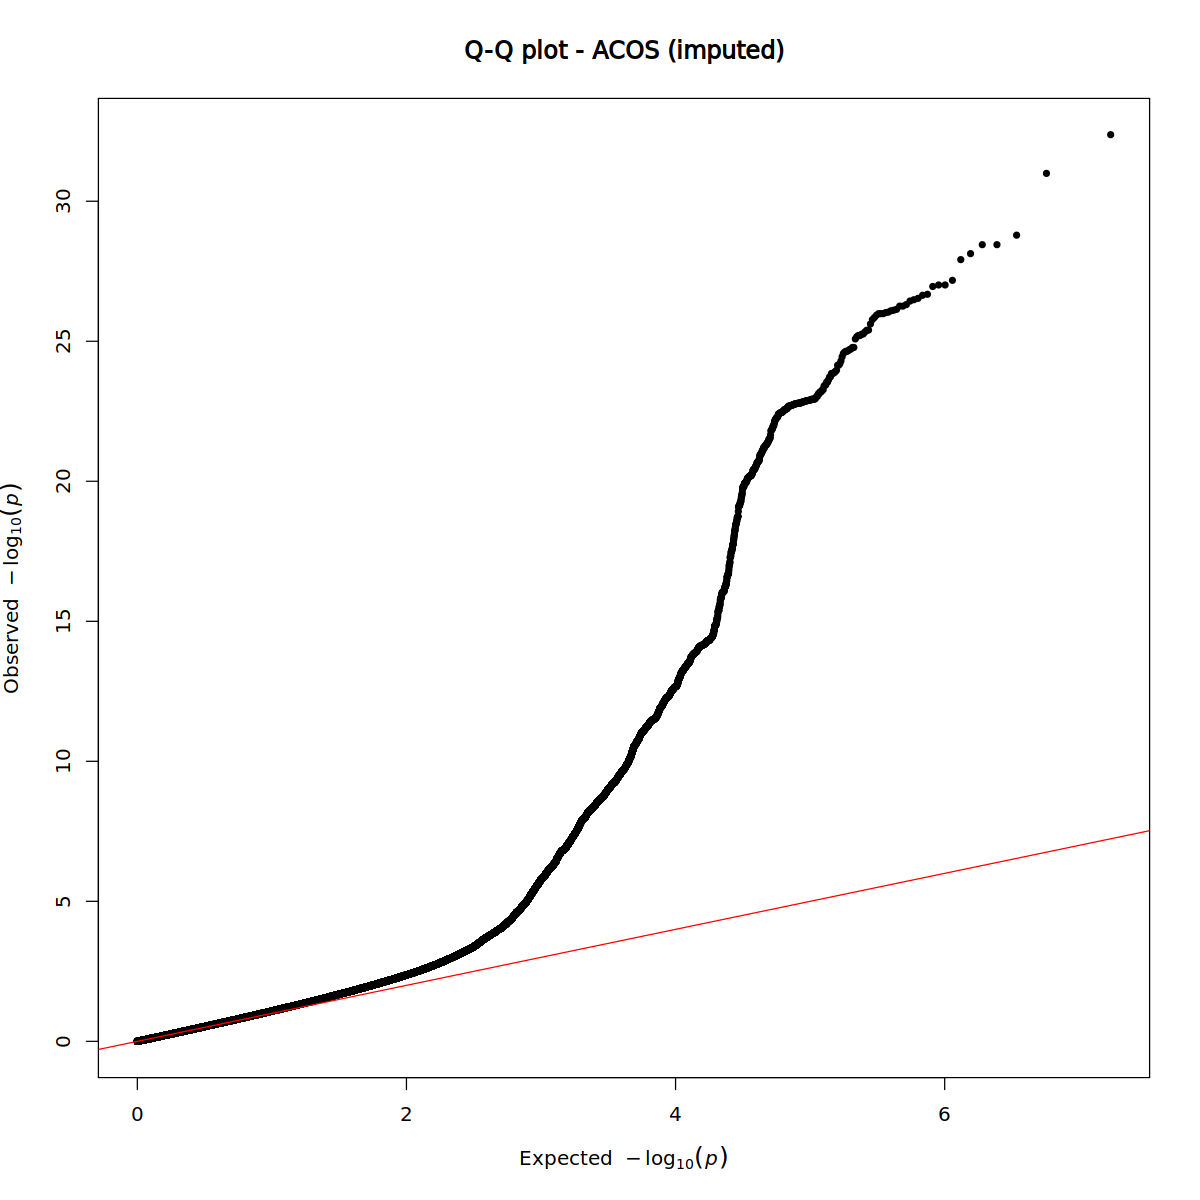

In [46]:
options(repr.plot.width = 10, repr.plot.height = 10)

qq(
  gwas$pvalue,
  main = paste0("Q-Q plot - ", gwas_title)
)